<a href="https://colab.research.google.com/github/SungHunYang/AI_Project/blob/main/FashoinMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import tensorflow as tf
 import numpy as np
 from tensorflow import keras
 import matplotlib.pyplot as plt

In [ ]:
mnist = keras.datasets.fashion_mnist
class_name = ['T-shirt/top','Trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

(train_images, train_labels),(test_images, test_labels) = mnist.load_data() # 이미지 사진들과, 사진에 맞는 번호 # 10장으로 구분 0 ~ 9 까지 label

In [ ]:
print(train_labels.shape)
print(train_images.shape)

(60000,)


In [ ]:
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts)) # 1번 6000장 , 2번 6000장 .. 이렇게 9번까지 각각 6000장씩 넣기.
# 즉 번호(label) 맞춰서 label이 몇개씩 있는지 만들기

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [ ]:
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

데이터 시각화

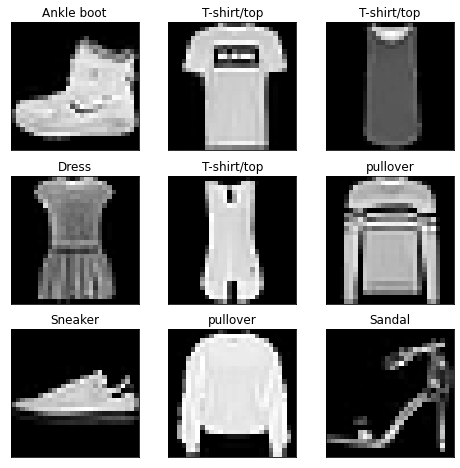

In [ ]:
plt.figure(figsize=(8,8)) # 그림의 크기 조절 8,8 사이즈
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_name[train_labels[i]])
plt.show()


데이터 전처리

In [ ]:
train_images = train_images.astype(np.float32)/255.
test_images = test_images.astype(np.float32)/255.   # 보통 이미지가 0~ 255 니까 0~ 1 로 바꿔주는거

# one hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10) # 0 ~ 9 까지 원핫인코딩 0000000001
test_labels = keras.utils.to_categorical(test_labels, 10)

데이터 만들기

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(64)
# MNIST의 학습데이터 (60000, 28, 28)가 입력되면, 60000개의 slices로 만들고 각각의 slice는 28×28의 이미지 크기를 갖게 됩니다.
# return 받길 원하는 데이터를 튜플 (data, label)로 받을수도
# (train_images, train_labels) 묶어서 만들겠다.
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)
# batch는 60000개 그림을 64개씩 나누겠다는 거고, shuffle은 매번 그림을 섞어서 train할수 있게 하는 것이다.

Featrue batch shape : (64, 28, 28)
labels batch shape : (64, 10)


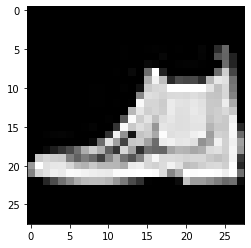

Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# dataset을 통해 반복하기
# 이미지와 정답(label)을 표시
images, lbs = next(iter(train_dataset)) # train_dataset은 image와 label을 가지고 있음
print(f"Featrue batch shape : {images.shape}")
print(f"labels batch shape : {lbs.shape}")
# 원핫 된 lbs가 64개 들어있음
image = images[0]
lb = lbs[0]
plt.imshow(image,cmap='gray')
plt.show()
print(f"Label : {lb}")

Model

In [ ]:
# Sequential API
def create_seq_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28))) # 이미지가 28 * 28 이니까
  # 첫번째 layer는 반드시 input_shape을 적어줘야 한다. 퍼셉트론 레이어를 만들때에는 Flatten으로 쫙 펴줘야 함
  model.add(keras.layers.Dense(128, activation='relu')) # 뉴런 개수 128
  model.add(keras.layers.Dropout(0.2)) # 잘못 판단하는것을 막아주는
  model.add(keras.layers.Dense(10, activation='Softmax')) # 마지막 결과 나올게 10개 (그림 재료 10개)
  return model


In [ ]:
seq_model = create_seq_model()
seq_model.summary() # 이걸 하면 정보가 쫙 나옴

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Functional API
def create_func_model(): # 왼쪽 오른쪽 왔다갔다 까지 가능하게 해주는게 Functional
  inputs = keras.Input(shape=(28,28))
  flatten = keras.layers.Flatten()(inputs)
  dense = keras.layers.Dense(128, activation='relu')(flatten) # ()를 통해서 들어올 layer(이전)를 선택
  drop = keras.layers.Dropout(0.2)(dense)
  outputs = keras.layers.Dense(10, activation='softmax')(drop)
  model = keras.Model(inputs = inputs, outputs = outputs) # input과 output이 어떤것인지 정해서 넣어줌
  return model
  # 바느질로 연결된것 처럼 생각하면 된다.

In [ ]:
func_model = create_func_model()
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class SubClassModel(keras.Model):
  def __init__(self):
    super(SubClassModel, self).__init__()
    self.flatten = keras.layers.Flatten(input_shape=(28, 28))
    self.dense1 = keras.layers.Dense(128, activation='relu')
    self.drop = keras.layers.Dropout(0.2)
    self.dense2 = keras.layers.Dense(10, activation='Softmax')
  def call(self,x,training=False): # 오버라이딩 __call__
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    x = self.dense2(x)
    return x
    # training=False을 반드시 넣어줘야한다. 이게 있냐 없냐에 동작방식이 다르다.

In [ ]:
subclass_model = SubClassModel()
inputs = tf.zeros((1,28,28)) # 1이 batch size
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  100480    
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Traning / Validation

In [ ]:
# keras API 사용하는 방법
learning_rate = 0.001
seq_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),loss ='categorical_crossentropy',metrics=['accuracy'])
# 학습방법중 Adam 사용 (gradient랑 비슷하다.)

In [ ]:
history = seq_model.fit(train_dataset, epochs=10, validation_data = test_dataset) # epochs은 몇번 돌리냐는 뜻이다.
# fit을 통해서 최적화 과정을 거침

## 사실 history라는 변수로 받지 않아도 수행되지만 받은 이유는
## 변수로 받게 되면 history라는 변수가 'val_loss', 'loss', 'accuracy' 'val_loss' 이런 것들을 저장하기 때문이다.

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5521 - accuracy: 0.8050 - val_loss: 0.4293 - val_accuracy: 0.8469
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4061 - accuracy: 0.8549 - val_loss: 0.3903 - val_accuracy: 0.8588
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3677 - accuracy: 0.8681 - val_loss: 0.3904 - val_accuracy: 0.8604
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3452 - accuracy: 0.8741 - val_loss: 0.3670 - val_accuracy: 0.8675
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3312 - accuracy: 0.8781 - val_loss: 0.3731 - val_accuracy: 0.8615
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3181 - accuracy: 0.8830 - val_loss: 0.3462 - val_accuracy: 0.8753
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3064 - accuracy: 0.8872 - val_loss: 0.3510 - val_accuracy: 0.8706
Epoch 

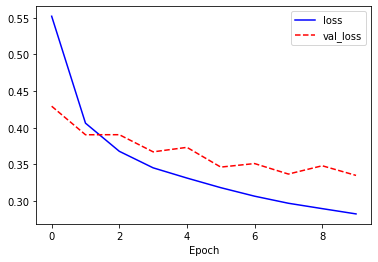

In [ ]:
# plot losses
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

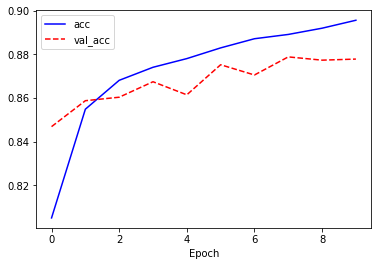

In [ ]:
# plot Accuracy
plt.plot(history.history['accuracy'],'b-',label='acc')
plt.plot(history.history['val_accuracy'],'r--',label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

위에서 보면 training_loss는 training 이 시작할때 부터 끝까지의 loss의 평균을 측정하고, val_loss validation은 한번 epoch이 끝나고 나서 계산하기 때문에 두 값이 역전되는 상황이 나올 수도 있다.

In [ ]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

# optimizer
learing_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

In [ ]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')
# 화면에 출력하거나 하기위해 한다. 한 epoch 당 이걸 출력한다.

# metrics는 측정하기 위한 용도인데 
# 측정항목 함수는 loss function와 비슷하지만, 측정항목을 평가한 결과는 모델을 학습시키는데 사용되지 않는다는 점에서 다릅니다. 
# 어느 손실 함수나 측정항목 함수로 사용할 수 있습니다.

In [ ]:
from numpy.lib.function_base import gradient
@tf.function # 속도를 빠르게 해주는 ( but 얘가 있으면 안에 print 같은게 안됨 썻다 지웠다 하면서 해야함)
def train_step(model,images,labels):
  with tf.GradientTape() as tape: # backpropagation을 진행하는 역할
    # training = True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout)
    predictions = model(images, training=True) 
    loss = loss_object(labels, predictions) 
    # predictions , loss 얘는 위에서 만든것들이다.
    # tf.GradientTape() 안에는 input image 부터 loss까지를 넣어주면 된다.
    # training True 하면 트레이닝을 한다는 뜻이다.
  gradients = tape.gradient(loss, model.trainable_variables) # model에 있는 w, b 모든 변수들을 loss에 대해 미분 하라는 뜻
  optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # 원래의 값에 learning_rate 곱해서 빼는 역할을 optimizer라고 한다.

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function 
def test_step(model,images,labels):
  
  predictions = model(images, training=False)  # test는 training을 하는게 아니라 맞는 지 확인하는 것이기 때문에 False
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
# 실제로 학습시키는 곳

EPOCHS = 10
for epoch in range(EPOCHS):
  # loss와 accuracy가 수행하기 이전에 저장된 값들이 있으니까 
  # 다음 epoch에서 시작할때 metrics를 reset 시킨다.
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(func_model, images, labels)
  
  for t_images, t_labels in test_dataset:
    test_step(func_model, t_images, t_labels)

  print(
      f'Epoch {epoch + 1 }, '
      f'Loss: {train_loss.result()}, '
      f'Accuracy: {train_accuracy.result()*100}, '
      f'Test Loss: {test_loss.result()}, '
      f'Test Accuracy: {test_accuracy.result()*100}'
  ) # 정확도는 100점 만점으로 표시하려고

Epoch 1, Loss: 0.557159960269928, Accuracy: 80.45832824707031, Test Loss: 0.4359036684036255, Test Accuracy: 84.1500015258789
Epoch 2, Loss: 0.4033990800380707, Accuracy: 85.37667083740234, Test Loss: 0.3881995379924774, Test Accuracy: 85.63999938964844
Epoch 3, Loss: 0.3684053122997284, Accuracy: 86.7066650390625, Test Loss: 0.3710551857948303, Test Accuracy: 86.69000244140625
Epoch 4, Loss: 0.3464275002479553, Accuracy: 87.461669921875, Test Loss: 0.3601591885089874, Test Accuracy: 86.58999633789062
Epoch 5, Loss: 0.32806843519210815, Accuracy: 87.9949951171875, Test Loss: 0.3562989830970764, Test Accuracy: 87.19000244140625
Epoch 6, Loss: 0.31838440895080566, Accuracy: 88.30500030517578, Test Loss: 0.36067086458206177, Test Accuracy: 86.8499984741211
Epoch 7, Loss: 0.3070528209209442, Accuracy: 88.66500091552734, Test Loss: 0.3562230169773102, Test Accuracy: 87.05000305175781
Epoch 8, Loss: 0.2971697449684143, Accuracy: 89.00666809082031, Test Loss: 0.34698569774627686, Test Accurac

모델 저장하고 불러오기 (학습된 모델, w, b 저장해서 불러오기)

In [ ]:
seq_model.save_weights('seq_model.ckpt') # ckpt는 체크포멧이라는 확장자, 확장자는 아무거나 해도 됨,
# seq_model이 저장된다.

In [ ]:
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
seq_model_2.evaluate(test_dataset) # 학습을 진행하지 않고 결과만 뽑아서 정확도와 loss만 뽑아줌

157/157 [==============================] - 1s 2ms/step - loss: 2.4660 - accuracy: 0.1017


[2.4660372734069824, 0.10170000046491623]

In [ ]:
seq_model_2.load_weights('seq_model.ckpt') # 저장했던 weight를 덮어쓰면

In [ ]:
seq_model_2.evaluate(test_dataset) # 정확도가 올라감

157/157 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8779


[0.3348032236099243, 0.8779000043869019]

모델 전체를 저장하고 불러오기

In [ ]:
seq_model.save('seq_model') # 저장할 경로 설정

INFO:tensorflow:Assets written to: seq_model/assets


INFO:tensorflow:Assets written to: seq_model/assets


In [ ]:
!ls # 저장된 위치 확인하는거
seq_model_3 = keras.models.load_model('seq_model')
seq_model_3.evaluate(test_dataset)

checkpoint   seq_model				 seq_model.ckpt.index
sample_data  seq_model.ckpt.data-00000-of-00001
157/157 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8779


[0.3348032236099243, 0.8779000043869019]

Tensorboard를 사용하여 시각화하기

In [ ]:
%load_ext tensorboard

Keras Callback 사용

In [ ]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
new_model_1.evaluate(test_dataset)
log_dir = './logs/new_model_1' # 모든걸 저장할 곳

tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1) # 경로, histogram_freq 에폭 몇번마다 저장할지

157/157 [==============================] - 1s 2ms/step - loss: 2.5018 - accuracy: 0.0876


In [ ]:
new_model_1.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset, callbacks=[tensorboard_cb]) # callback에 알아서 우리가 원하는 것들 저장됨

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5554 - accuracy: 0.8068 - val_loss: 0.4399 - val_accuracy: 0.8432
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4093 - accuracy: 0.8531 - val_loss: 0.4008 - val_accuracy: 0.8586
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3744 - accuracy: 0.8636 - val_loss: 0.3876 - val_accuracy: 0.8625
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3498 - accuracy: 0.8735 - val_loss: 0.3628 - val_accuracy: 0.8686
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3324 - accuracy: 0.8793 - val_loss: 0.3546 - val_accuracy: 0.8743
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3190 - accuracy: 0.8832 - val_loss: 0.3531 - val_accuracy: 0.8734
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3101 - accuracy: 0.8862 - val_loss: 0.3426 - val_accuracy: 0.8767
Epoch 

In [ ]:
%tensorboard --logdir $log_dir # 이건 원래 보통 콘솔이나 인터넷창으로 띄워서 사용

summary Writer 사용

In [ ]:
new_model_2 = create_seq_model()

In [ ]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

# optimizer
learing_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

@tf.function 
def train_step(model,images,labels):
  with tf.GradientTape() as tape: 
    predictions = model(images, training=True) 
    loss = loss_object(labels, predictions) 
  gradients = tape.gradient(loss, model.trainable_variables) 
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function 
def test_step(model,images,labels):
  
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)  

In [ ]:
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test' # 파일 만들기
train_summary_writer = tf.summary.create_file_writer(train_log_dir) # 만드는 법
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

# writer를 만드는 과정 # 시간에 따라서 디렉토리 명을 다르게 하는

In [ ]:
EPOCHS = 10
for epoch in range(EPOCHS):
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(func_model, images, labels)
  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy',train_accuracy.result(), step=epoch) # scalar를 통해서 loss와 accuracy를 writer에 저장하게 된다.

  for t_images, t_labels in test_dataset:
    test_step(func_model, t_images, t_labels)
  with test_summary_writer.as_default():
    tf.summary.scalar('loss',test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy',test_accuracy.result(), step=epoch)

  print(
      f'Epoch {epoch + 1 }, '
      f'Loss: {train_loss.result()}, '
      f'Accuracy: {train_accuracy.result()*100}, '
      f'Test Loss: {test_loss.result()}, '
      f'Test Accuracy: {test_accuracy.result()*100}'
  )

Epoch 1, Loss: 0.2724572420120239, Accuracy: 89.82666778564453, Test Loss: 0.3320910632610321, Test Accuracy: 88.3800048828125
Epoch 2, Loss: 0.2635107934474945, Accuracy: 90.18333435058594, Test Loss: 0.344340056180954, Test Accuracy: 87.91000366210938
Epoch 3, Loss: 0.25953829288482666, Accuracy: 90.26667022705078, Test Loss: 0.33417055010795593, Test Accuracy: 88.51000213623047
Epoch 4, Loss: 0.2522883415222168, Accuracy: 90.53166198730469, Test Loss: 0.32940441370010376, Test Accuracy: 88.20000457763672
Epoch 5, Loss: 0.2499338984489441, Accuracy: 90.5999984741211, Test Loss: 0.3329675495624542, Test Accuracy: 88.22000122070312
Epoch 6, Loss: 0.24225561320781708, Accuracy: 90.94000244140625, Test Loss: 0.3288242518901825, Test Accuracy: 88.30999755859375
Epoch 7, Loss: 0.24292540550231934, Accuracy: 90.8516616821289, Test Loss: 0.32132062315940857, Test Accuracy: 88.97000122070312
Epoch 8, Loss: 0.23982490599155426, Accuracy: 91.00999450683594, Test Loss: 0.3247970640659332, Test A

In [ ]:
%tensorboard --logdir 'logs/gradient_tape'

Reusing TensorBoard on port 6007 (pid 2103), started 0:02:21 ago. (Use '!kill 2103' to kill it.)

<IPython.core.display.Javascript object>